# Demo notebook for Concurrent Object Layers (CObL)

## Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Initialize model

In [2]:
from cobl import initialize_diffusion_model
ckpt_path = "cobl/model/cobl_added_params.ckpt"
model = initialize_diffusion_model("cobl/model/config.yaml", ckpt_path)

/n/holylabs/LABS/zickler_lab/Lab/adamaraju/envs/cobl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Target Module: cobl.ddpm.LatentDiffusion
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 20 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, c

## Load in sample image

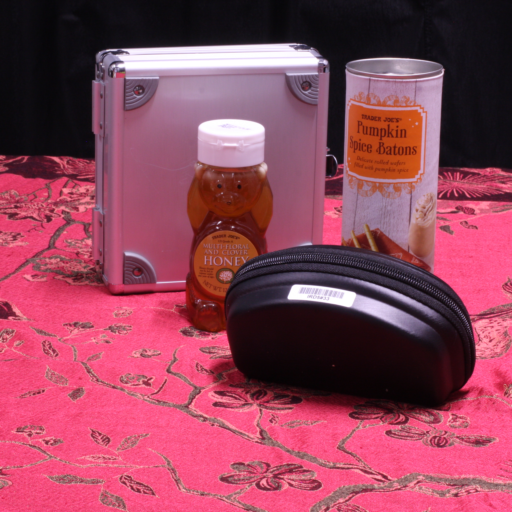

In [3]:
from PIL import Image
scene = Image.open('tabletop_sample.png').convert("RGB")
scene

## Run model

In [5]:
from cobl import Guided_Layer_Sampler, plot_obj_layers

#Set seed and initial latents
seed = 5
torch.manual_seed(int(seed))
torch.cuda.manual_seed_all(int(seed))
x_start = torch.randn(
    (1, 28, 64, 64),
    dtype=torch.float16,
    device='cuda',
)

#Set and run sampler
sampler = Guided_Layer_Sampler(model, n_steps=20)
out, logger = sampler.sample(x_start=x_start, batch_size=1, cond=scene, use_guidance=True)

Using cache found in /n/home07/adamaraju/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /n/home07/adamaraju/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /n/home07/adamaraju/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /n/home07/adamaraju/.cache/torch/hub/intel-isl_MiDaS_master
Index 0, Time: 0: 100%|██████████| 20/20 [00:45<00:00,  2.27s/it]   


Decoding the final timestep


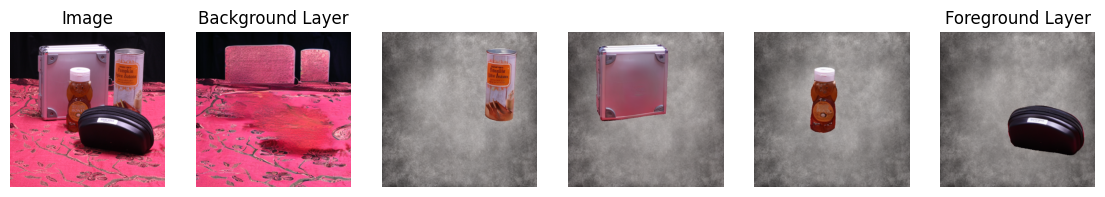

In [6]:
plot_obj_layers(scene, sampler, out);

# Tabletop loading and Training

(-0.5, 511.5, 511.5, -0.5)

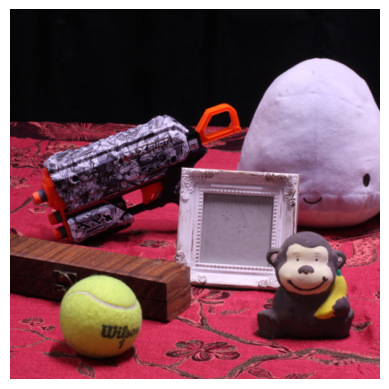

In [6]:
from cobl.Tabletop import Tabletop
train_dat = Tabletop(split="train")
test_dat = Tabletop(split="test")
scene = test_dat[2]["scene"]
fig, ax = plt.subplots(1,1)
ax.imshow(scene)
ax.axis('off')

In [ ]:
from cobl import initialize_training
trainer = initialize_training("cobl/model/config.yaml", override_eager=False)
batch = next(iter(trainer.train_dataloader))
trainer.plot_drawn_samples(batch, "test.png")
trainer.fit()

In [ ]:
# Reduce the checkpoint size by keeping only the added parameters
from cobl.load_utils import extract_missing_checkpoint_params
sd_ckpt_path = "cobl/LDM/SD2p1/v2-1_512-ema-pruned.ckpt"
cobl_ckpt_path = "cobl/model/model_snapshots/ckpt_last.ckpt"
save_path = "cobl/model/cobl_added_params.ckpt"
extract_missing_checkpoint_params(sd_ckpt_path, cobl_ckpt_path, save_path)
